# nuclei spotter

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [215]:
from fastai import *
from fastai.vision import *

In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
path = Path('/home/ubuntu/data/fastai/data/nuclei'); path.ls()

[PosixPath('/home/ubuntu/data/fastai/data/nuclei/stage1_train_labels.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/stage1_solution.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/test.png'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/stage1_test'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/train'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/.tmp'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/stage1_train'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/stage2_sample_submission_final.csv'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/stage2_test'),
 PosixPath('/home/ubuntu/data/fastai/data/nuclei/stage1_sample_submission.csv')]

### look at the data

In [5]:
stage1_train_labels = pd.read_csv(path/'stage1_train_labels.csv'); stage1_train_labels.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


In [6]:
trn_path = path/"stage1_train"; 

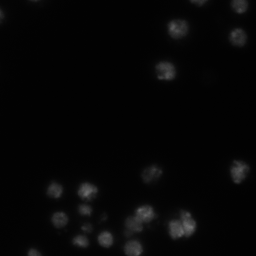

In [7]:
imgId, pixels = stage1_train_labels.iloc[0]
imgPath = trn_path/f'{imgId}/images/{imgId}.png'
open_image(imgPath)

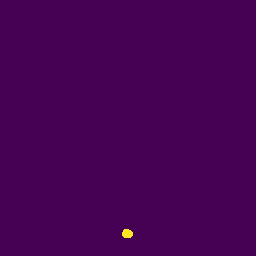

In [8]:
maskPath = trn_path/f'{imgId}/masks'
open_mask(maskPath.ls()[0])

### concatenate masks into 1 file per image

1x image --> 1y mask

In [9]:
def image2np(path):
    x = plt.imread(str(path))
#     x = PIL.Image.open(path).convert('L')
    a = np.asarray(x)
    return a.astype(np.float32, copy=False)
#     newTensor = torch.from_numpy(a )

In [10]:
def saveMask(arr, parentPath):
    plt.imsave(str(parentPath/'mask.png'),arr)

In [11]:
mask_fnames = [ img/'masks/total_mask.png' for img in trn_path.ls()]
img_fnames = [ img/f'images/{img.stem}.png' for img in trn_path.ls()]
img_folders = trn_path.ls()

In [12]:
curr_masks = [ [ mask for mask in (folder/'masks').ls()] for folder in img_folders ]

In [13]:
all_masks = reduce((lambda x,y: x + y), curr_masks)

In [14]:
np.amax(image2np(all_masks[0]))

1.0

In [46]:
def combineMasks(imagePath):
    imgId = imagePath.stem
    imgPath = imagePath/f'images/{imgId}.png'
    imgSize = image2np(imgPath).shape
    all_masks = np.zeros(imgSize[:2])
    masksPath = imagePath.parent/f'{imgId}/masks'

    # add masks to one into 1 image
    for mask in masksPath.ls():
        currMask = image2np(mask)
#         currMask = np.expand_dims(currMask)

        all_masks = np.maximum(all_masks, currMask )
    return all_masks

In [47]:
combineMasks(img_folders[0])

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 1., 1., 1., 1.],
       [0., 0., 0., 0., ..., 1., 1., 1., 1.],
       [0., 0., 0., 0., ..., 1., 1., 1., 1.],
       [0., 0., 0., 0., ..., 1., 1., 1., 1.]])

In [48]:
# plt.imshow??

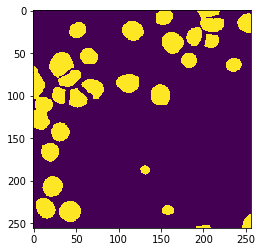

In [49]:
plt.imshow(combineMasks(img_folders[0]))

In [19]:
# put all images at in base level folder 
# images
# all masks in label folder called labels


In [93]:
train_path = path/'train'
label_path = path/'label'

In [28]:
# copy all images to path/train
for img in tqdm(img_folders):
    imgPath = str(img/f'images/{img.stem}.png')
    newImgPath = str(train_path/f'{img.stem}.png')
#     print(imgPath)
#     print('--> ',newImgPath)
    if not (train_path/f'{img.stem}.png').is_file():
        !cp {imgPath} {newImgPath} 
    
    

100%|██████████| 670/670 [00:00<00:00, 23556.20it/s]


In [95]:
# combine then copy all the masks to the train folder
for img in tqdm(img_folders):
    
    maskPath = label_path/f'{img.stem}_mask.png'
    mask = combineMasks(img)
    if not masksPath.is_file(): 
        plt.imsave(str(maskPath),mask)

100%|██████████| 670/670 [01:08<00:00,  5.78it/s]


In [53]:
def show_image(PathlibPath):
    im = plt.imread(str(PathlibPath))
    plt.imshow(im)
    
def pickRandom(l):
    rnd = random.randint(0,len(l))
    return l[rnd]

In [281]:
def getImgPath(pth): pth/f'images/{pth.stem}.png'

In [311]:
mask_fnames = [ img/'masks/total_mask.png' for img in trn_path.ls()]
img_fnames = [ img/f'images/{img.stem}.png' for img in trn_path.ls()]

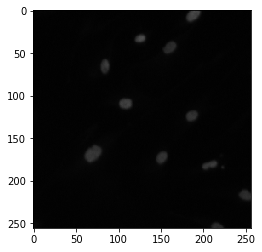

In [317]:
show_image(pickRandom(img_fnames))

## move the images to a different folder

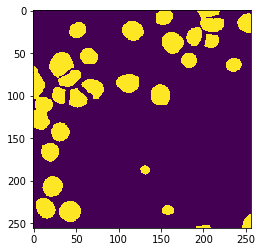

In [55]:
im = plt.imread(str(path/'test.png'))
plt.imshow(im)

In [153]:
np.zeros([256, 256])

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.]])

In [183]:
pil2tensor??
# open_mask??
# open_image??

In [147]:
arr = image2array(mask_img)

In [148]:
arr.shape

(256, 256)

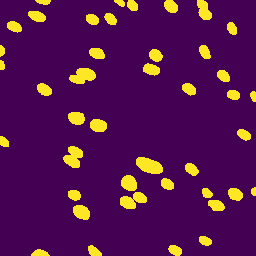

In [151]:
test_label = [ (label_path/f'{x.stem}_mask{x.suffix}') for x in train_path.ls() ][0]
open_mask(test_label)

## Now make a databunch!

In [189]:
lng = len(train_path.ls())
valid_pct = int(lng*0.2)
valid_idx = list(range(lng))[:valid_pct]

get_y_fn = lambda x: label_path/f'{x.stem}_mask{x.suffix}'

In [190]:
src = (ImageImageList.from_folder(train_path) 
       .split_by_idx(valid_idx)
       .label_from_func(get_y_fn))

In [191]:
tfms = get_transforms(do_flip=False, 
                      flip_vert=False, 
                      max_rotate=0., 
                      max_zoom=0., 
                      max_lighting=0.0, 
                      max_warp=0., 
                      p_affine=0., 
                      p_lighting=0.)

In [198]:
data = (src.transform(tfms, tfm_y=True, size=128)
       .databunch())
# data = src.databunch()

In [199]:
get_transforms??

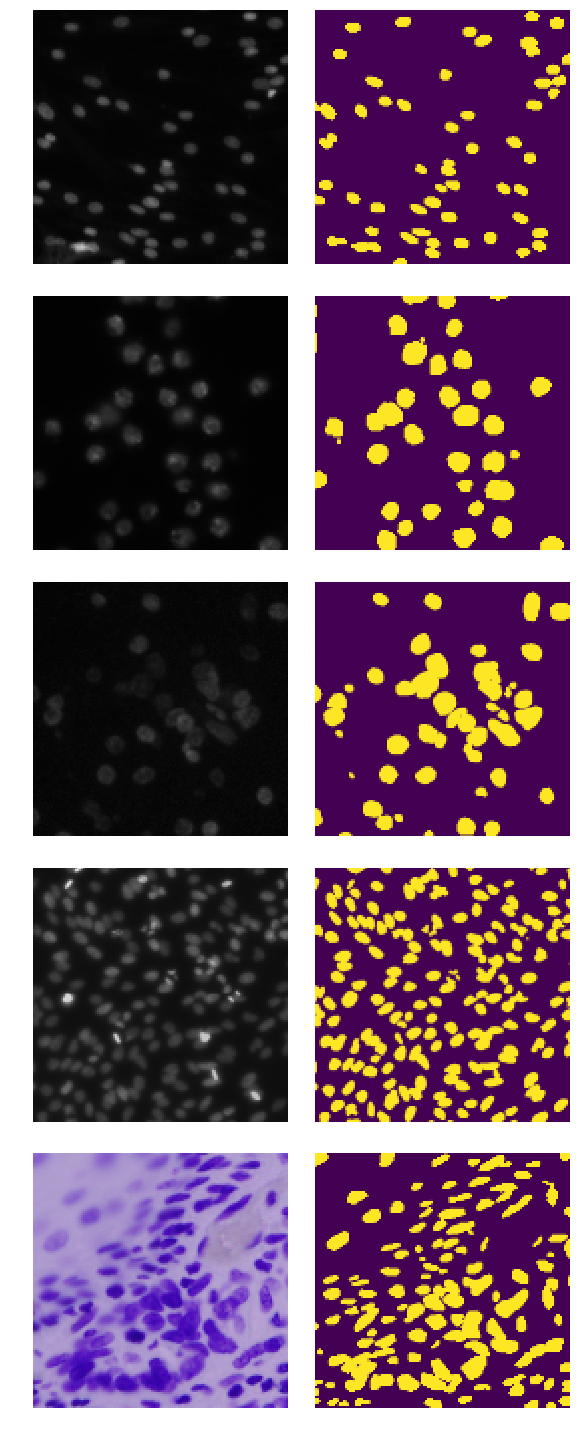

In [208]:
data.show_batch()

# The model and learner!

In [219]:
models.unet.DynamicUnet??

In [220]:
unet_learner??

In [ ]:
learn = unet_learner

In [188]:
metri

'1.1.0'